## Regularization

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# MNIST Dataset and Data Augmentation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip()
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Model with Dropout
class Net(nn.Module):
    def __init__(self, dropout_rate=0.5, l1_strength=0.0, l2_strength=0.0):
        super(Net, self).__init__()
        self.l1_strength = l1_strength
        self.fc1 = nn.Linear(28*28, 128)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Function for applying L1 regularization
def l1_penalty(model):
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    return l1_norm

# Training function
def train(model, device, train_loader, optimizer, epoch, l1_strength):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.CrossEntropyLoss()(output, target)
        if l1_strength > 0:  # apply L1 regularization if needed
            loss += l1_strength * l1_penalty(model)
        loss.backward()
        optimizer.step()

# Test function
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    loss_function = nn.CrossEntropyLoss(reduction='sum')
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_function(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Net(dropout_rate=0.5, l1_strength=0.01).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01) # L2 regularization is applied here

for epoch in range(1, 11): # 10 epochs
  train(model, device, train_loader, optimizer, epoch, l1_strength=0.01)
  test(model, device, test_loader)



Test set: Average loss: 2.1017, Accuracy: 4573/10000 (46%)


Test set: Average loss: 2.0719, Accuracy: 4907/10000 (49%)


Test set: Average loss: 2.0326, Accuracy: 5801/10000 (58%)


Test set: Average loss: 2.0307, Accuracy: 5482/10000 (55%)


Test set: Average loss: 1.9849, Accuracy: 6289/10000 (63%)


Test set: Average loss: 1.9658, Accuracy: 6147/10000 (61%)


Test set: Average loss: 1.9760, Accuracy: 6017/10000 (60%)


Test set: Average loss: 1.9664, Accuracy: 5886/10000 (59%)


Test set: Average loss: 1.9614, Accuracy: 5983/10000 (60%)


Test set: Average loss: 1.9559, Accuracy: 5699/10000 (57%)



## Learning Rate Scheduling

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

# Dummy dataset
X_train = np.random.random((100, 20))
y_train = np.random.randint(2, size=(100, 1))

# Create a simple model
model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(1, activation='sigmoid')
])

# Initial learning rate
initial_learning_rate = 0.1

# Step Decay Function
def step_decay(epoch):
    drop_rate = 0.5
    epochs_drop = 10.0
    new_lr = initial_learning_rate * (drop_rate ** np.floor((1+epoch)/epochs_drop))
    return new_lr

# Compile the model
optimizer = SGD(lr=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(step_decay)

# Train the model
model.fit(X_train, y_train, epochs=50, callbacks=[lr_scheduler])


Epoch 1/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.5100 - lr: 0.1000
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.5500 - lr: 0.1000
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.5800 - lr: 0.1000
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.5600 - lr: 0.1000
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6711 - accuracy: 0.6100 - lr: 0.1000
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.6100 - lr: 0.1000
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.6000 - lr: 0.1000
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6574 - accuracy: 0.5900 - lr: 0.1000
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.5900 - lr: 0.1000
Epoch 10/50
4/4 [==

## Data Augmentation

In [18]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 3.3 MB/s eta 0:00:00


In [19]:
import nlpaug.augmenter.word as naw

text = "The quick brown fox jumps over the lazy dog"

# Initialize the augmenter for synonym replacement
aug = naw.SynonymAug(aug_src='wordnet')

# Apply augmentation
augmented_text = aug.augment(text)
print("Original Text:", text)
print("Augmented Text:", augmented_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Original Text: The quick brown fox jumps over the lazy dog
Augmented Text: ['The quick robert brown fox jumps complete the otiose dog']


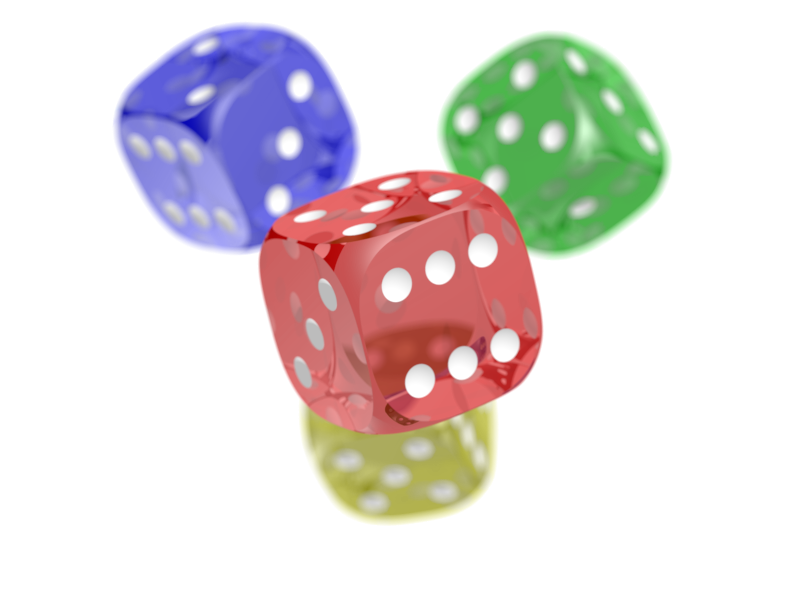

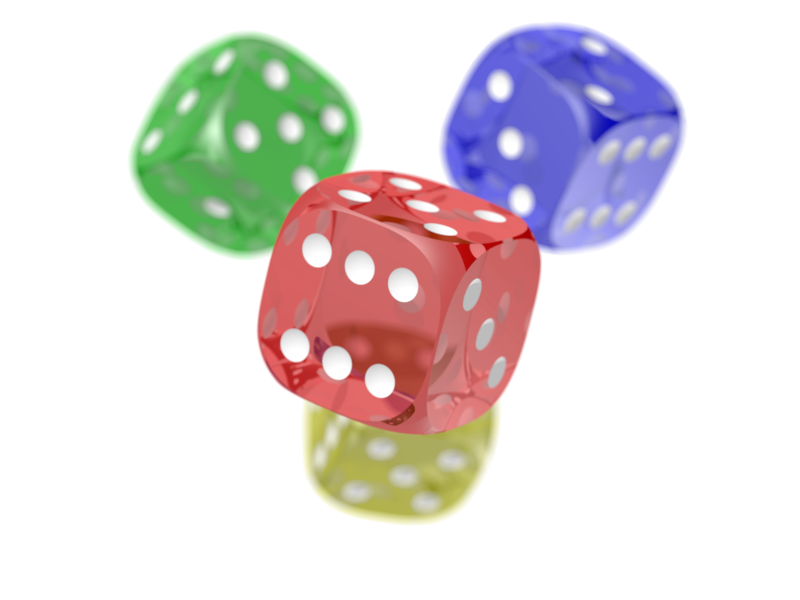

In [20]:
from PIL import Image, ImageOps
import requests
from io import BytesIO
from IPython.display import display

# Load a sample image from a URL
url = 'https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png'
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Apply a simple augmentation: flipping the image
augmented_image = ImageOps.mirror(image)

# Display the original and augmented images using IPython.display
display(image, augmented_image)

In [21]:
!pip install librosa

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an example audio file
y, sr = librosa.load(librosa.ex('trumpet'))

# Apply time-stretching augmentation
y_augmented = librosa.effects.time_stretch(y, rate=1.5)

# Plot the waveforms
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio')
plt.subplot(1, 2, 2)
librosa.display.waveshow(y_augmented, sr=sr)
plt.title('Time-Stretched Audio')
plt.show()
